In [ ]:

# Este es un ejercicio de predicción de demanda
# el dataset puede descargarse del siguiente link
# https://www.kaggle.com/datasets/contactprad/bike-share-daily-data


In [17]:
# importamos los módulos para esta prediccion

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [26]:
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
caracteristicas_numericas = ['temp', 'atemp', 'hum', 'windspeed']
caracteristicas_categoricas = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[caracteristicas_numericas].describe()
print(bike_data.head())


   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  


In [19]:
# Separamos características y  and labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# dividimos los datos 70%-30% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


Training Set: 511 rows
Test Set: 220 rows


In [20]:
bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,27
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,28
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,29
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,30


In [21]:
# entrenamiento del modelo
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
model = GradientBoostingRegressor().fit(X_train, y_train)

# Evaluación del modelo
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)


MSE: 103761.77732907103
RMSE: 322.1207496096317
R2: 0.7965815480134714


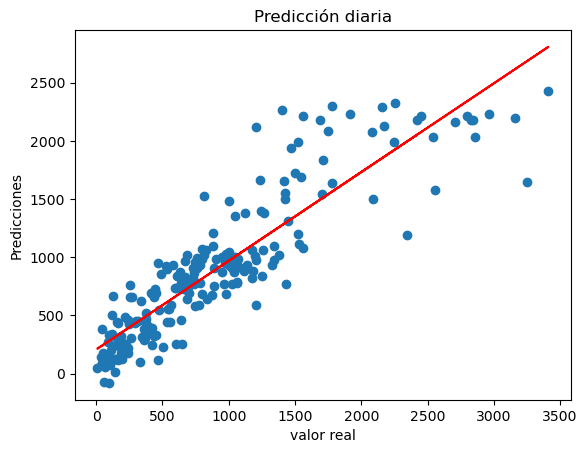

In [22]:
# predicciones vs valor real

plt.scatter(y_test, predictions)
plt.xlabel('valor real')
plt.ylabel('Predicciones')
plt.title('Predicción diaria')

# línea de regresión

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# utilizamos Gradient Boosting 
alg = GradientBoostingRegressor()

# selección de hiper parámetros
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }



In [24]:
# combinación de hiper parámetros que optimicen lal metrica r2

score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")


Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 



In [25]:
# Este es el mejor model
model=gridsearch.best_estimator_
print(model, "\n")


GradientBoostingRegressor() 

